In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score, r2_score, f1_score,\
roc_auc_score,mean_absolute_error,mean_absolute_percentage_error,max_error


In [2]:
data_fin_imprt=pd.read_csv("final.csv",  delimiter=',')


In [3]:
data_fin_imprt.head(15)

In [4]:

x=data_fin_imprt.drop('SalePrice',axis=1)
y=data_fin_imprt['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [5]:
mlp_model = MLPRegressor(random_state=1, max_iter=500)
mlp_model.fit(x_train, y_train)# fitting the model
mlp_model_predict = mlp_model.predict(x_test)# predicting the values

In [6]:
Lin_lasso_mod_sc=mlp_model.score(x_train,y_train)#best '1'
print('Multilayer Perceptron Regression Model Score  : ',round(Lin_lasso_mod_sc,3))
r2=r2_score(y_test,mlp_model_predict)# computing and displaying the R.Sq of the model, best 'above0.9'
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)#0.8+
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,mlp_model_predict)# computing and displaying the Mean square error of the model, best 0
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=mean_squared_error(y_test,mlp_model_predict,squared = False)#best 0
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, mlp_model_predict)#best 0
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(mlp_model, x, y,scoring='r2' ,cv=5) #best 100
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") # Accuracy of moadel based on parameter supplied by GridsearchCV

Multilayer Perceptron Regression Model Score  :  0.703
R Sq. Value :  0.64
Adjusted R Sq. Value is :  0.607
Mean Square Error is :  0.066
Root Mean Square Error is :  0.257
Mean Absoulue Error is :  0.176
Accuracy : 4.0 %


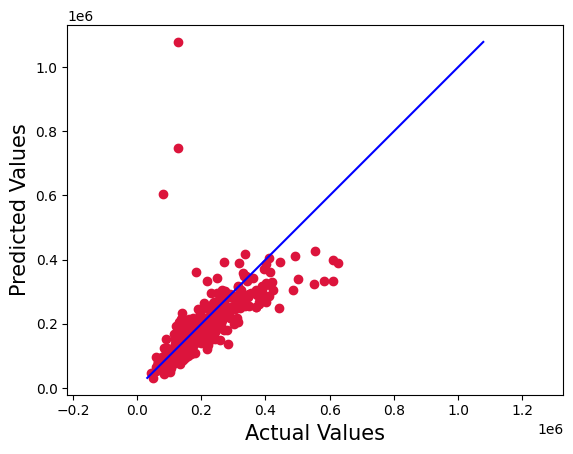

In [7]:


Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(mlp_model_predict)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

C:\Users\hites\AppData\Local\Temp\ipykernel_38288\2132624469.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-mlp_model_predict),bins=100);


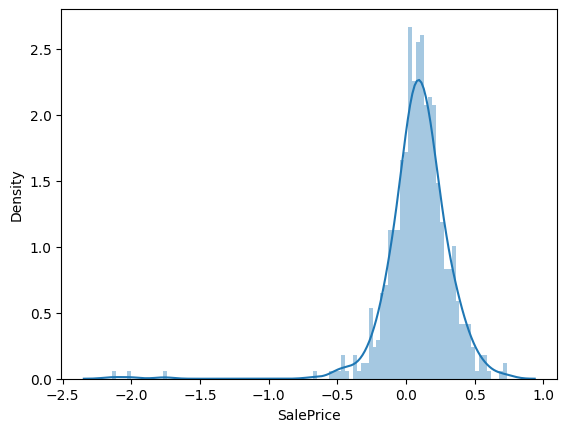

In [8]:
sb.distplot((y_test-mlp_model_predict),bins=100); 

In [9]:
param_list = {"hidden_layer_sizes": [(1,),(50,)], "activation": ["identity", "logistic", "tanh", "relu"], "solver":\
     ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}

In [10]:
G_CV_lin_rid = GridSearchCV(estimator=mlp_model, param_grid=param_list, cv= 5) #  using grid search method to optimise model with hyperparameter tuning

G_CV_lin_rid.fit(x_train, y_train)# fitting the model
G_CV_lin_rid.best_params_ # displaying optimised parameters for optimal tuning of model

{'activation': 'tanh',
 'alpha': 5e-05,
 'hidden_layer_sizes': (50,),
 'solver': 'lbfgs'}

In [11]:
mlp_model = MLPRegressor(random_state=1, max_iter=500 ,activation='tanh', hidden_layer_sizes=50, solver='lbfgs',alpha=5e-05)
mlp_model.fit(x_train, y_train)# fitting the model
mlp_model_predict = mlp_model.predict(x_test)# predicting the values

C:\Users\hites\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [12]:
mlp_mod_sc=mlp_model.score(x_train,y_train)#best '1'
print('Multilayer Perceptron Regression Model Score  : ',round(mlp_mod_sc,3))
r2=r2_score(y_test,mlp_model_predict)# computing and displaying the R.Sq of the model, best 'above0.9'
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)#0.8+
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,mlp_model_predict)# computing and displaying the Mean square error of the model, best 0
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=mean_squared_error(y_test,mlp_model_predict,squared = False)#best 0
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, mlp_model_predict)#best 0
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(mlp_model, x, y,scoring='r2' ,cv=5) #best 100
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") # Accuracy of moadel based on parameter supplied by GridsearchCV

Multilayer Perceptron Regression Model Score  :  0.74
R Sq. Value :  0.79
Adjusted R Sq. Value is :  0.772
Mean Square Error is :  0.038
Root Mean Square Error is :  0.195
Mean Absoulue Error is :  0.148


C:\Users\hites\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\hites\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\hites\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs

Accuracy : 72.41 %


C:\Users\hites\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


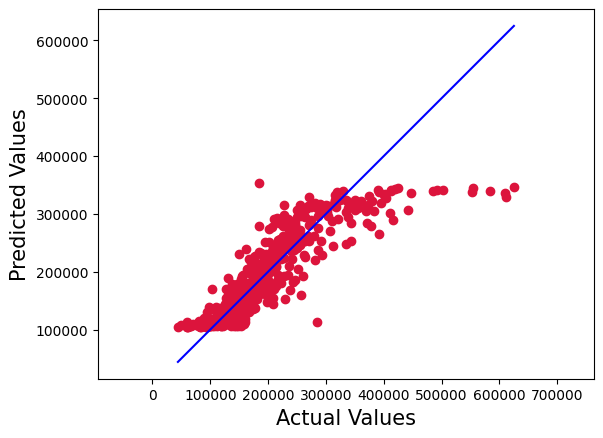

In [13]:


Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(mlp_model_predict)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

C:\Users\hites\AppData\Local\Temp\ipykernel_38288\2132624469.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-mlp_model_predict),bins=100);


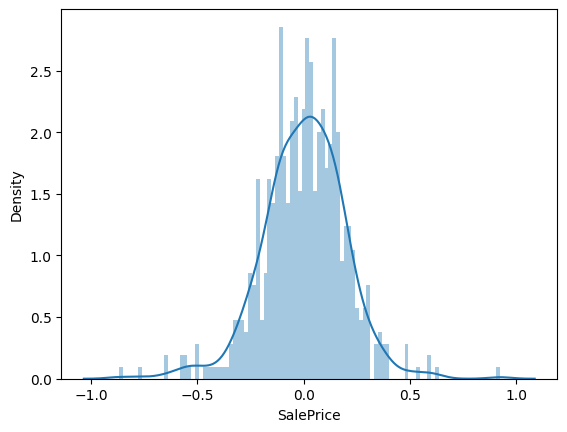

In [14]:
sb.distplot((y_test-mlp_model_predict),bins=100); 